In [71]:
!pip install --quiet quandl plotly git+https://github.com/ethho/memoize.git lmfit
!mkdir -p ./data/final_proj
!wget --quiet -O final_proj.py https://github.com/ethho/finm-33150/raw/main/final_proj.py
!wget --quiet -O strat_returns.py https://github.com/ethho/finm-33150/raw/main/strat_returns.py
!wget --quiet -O data/final_proj/uszcb.csv https://github.com/ethho/finm-33150/raw/main/data/final_proj/uszcb.csv

In [25]:
import os
import sys
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import final_proj
import strat_returns

%matplotlib inline
# pd.options.display.float_format = '{:,.4f}'.format

DARK_MODE = True
if DARK_MODE:
    plt.style.use('dark_background')
    plotly_template = 'plotly_dark'
else:
    plt.style.use('ggplot')
    plotly_template = 'ggplot2'

# 20230305_analyze_strat_returns

Ethan Ho 3/5/2023

@mpcs
@finm

----

# Fetch Data

In [37]:
!python3 strat_returns.py

Using first non-null date as start_date='2001-08-29'
Using first non-null date as start_date='2001-08-29'
Wrote strategy returns to ./data/final_proj/strat_n1A_135.csv
Using first non-null date as start_date='2001-08-29'
Using first non-null date as start_date='2001-08-29'
Wrote strategy returns to ./data/final_proj/strat_n2A_0510.csv


In [38]:
strat_n2A_0510 = pd.read_csv('./data/final_proj/strat_n2A_0510.csv', index_col=0, parse_dates=True)
strat_n2A_0510

,1,-1,0,signal,pnl,pnl_pct,long_pnl_pct,short_pnl_pct
date,,,,,,,,
2001-08-29,-6441.831431,-712.014723,0,1,-6441.831431,-0.322092,-0.322092,-0.035601
2001-09-26,-43541.745398,36387.899244,0,1,-43541.745398,-2.177087,-2.177087,1.819395
2001-10-24,-9704.986361,2551.140207,0,1,-9704.986361,-0.485249,-0.485249,0.127557
2001-11-21,-6698.548769,-455.297385,0,1,-6698.548769,-0.334927,-0.334927,-0.022765
2001-12-19,-13290.281085,6136.434931,0,1,-13290.281085,-0.664514,-0.664514,0.306822
...,...,...,...,...,...,...,...,...
2022-08-03,-3037.898515,-4115.947639,0,-1,-4115.947639,-0.205797,-0.151895,-0.205797
2022-08-31,-614.908954,-6538.937200,0,-1,-6538.937200,-0.326947,-0.030745,-0.326947
2022-09-28,6925.076061,-14078.922215,0,-1,-14078.922215,-0.703946,0.346254,-0.703946


In [39]:
strat_n2A_0510.describe()

,1,-1,0,signal,pnl,pnl_pct,long_pnl_pct,short_pnl_pct
count,278.000000,278.000000,278.0,278.000000,278.000000,278.000000,278.000000,278.000000
mean,-5379.963584,-1773.882570,0.0,-0.064748,-1919.091450,-0.095955,-0.268998,-0.088694
std,8213.838337,8213.838337,0.0,0.733013,5903.044908,0.295152,0.410692,0.410692
min,-66716.614905,-23977.705449,0.0,-1.000000,-43541.745398,-2.177087,-3.335831,-1.198885
25%,-5695.042102,-4362.968768,0.0,-1.000000,-3394.506662,-0.169725,-0.284752,-0.218148
50%,-3840.790468,-3313.055686,0.0,0.000000,0.000000,0.000000,-0.192040,-0.165653
75%,-2790.877386,-1458.804051,0.0,0.000000,0.000000,0.000000,-0.139544,-0.072940
max,16823.859295,59562.768751,0.0,1.000000,59562.768751,2.978138,0.841193,2.978138


# Plot PnL Series of Naive Strategy 2-A

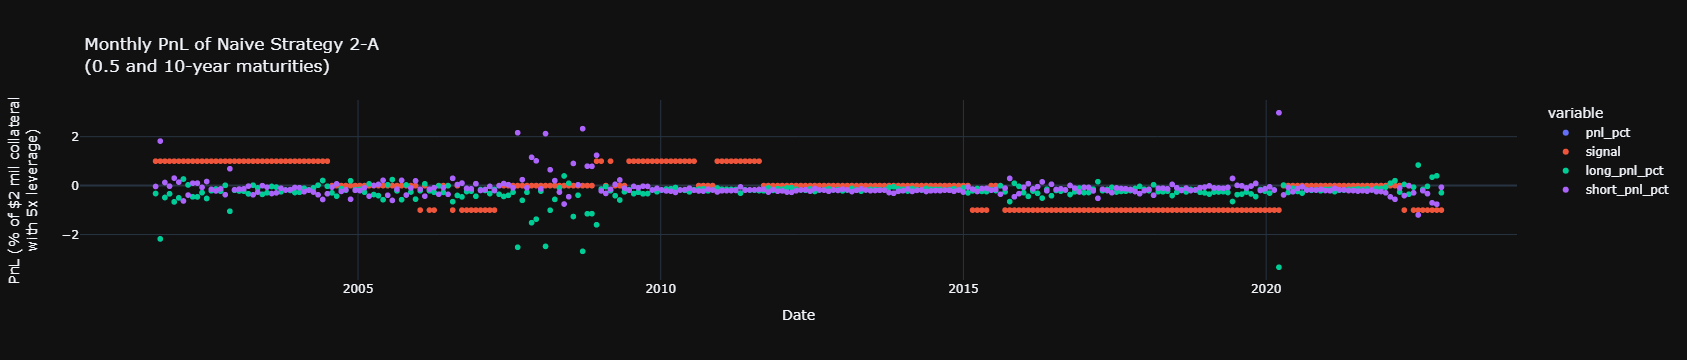

In [40]:
def plot_pnl(**kw):
    fig = px.scatter(
        strat_n2A_0510[[
            'pnl_pct', 'signal',
            'long_pnl_pct', 'short_pnl_pct'
        ]].rename({
        }),
        labels = {
            'date': 'Date',
            'value': 'PnL (% of $2 mil collateral<br>with 5x leverage)',
        },
        title=f'Monthly PnL of Naive Strategy 2-A<br>(0.5 and 10-year maturities)',
        template=plotly_template,
        **kw
    )
    return fig

plot_pnl()

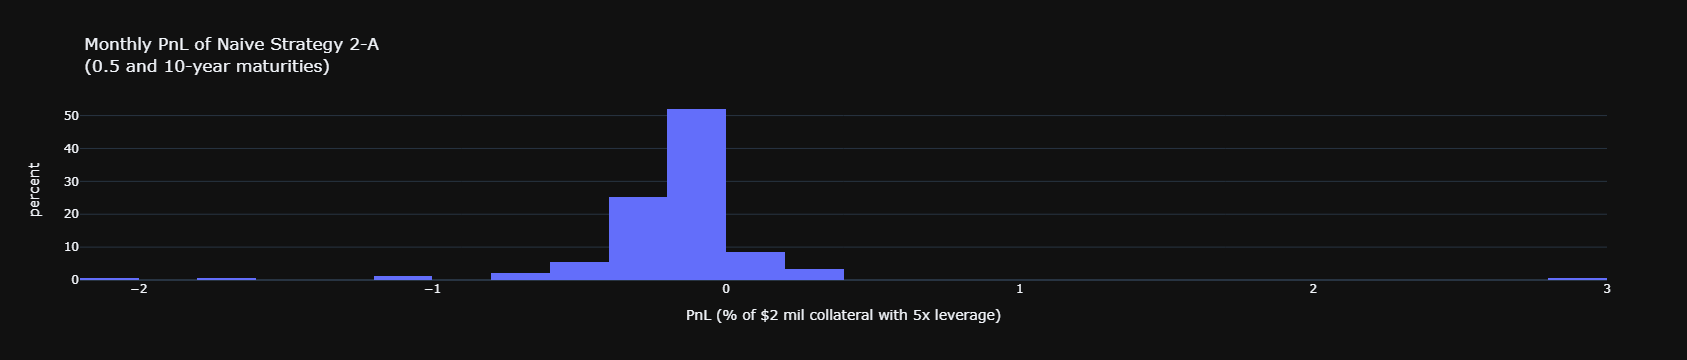

In [41]:
pnl_not_flat = strat_n2A_0510.loc[strat_n2A_0510['signal'] != 0., 'pnl_pct']

def plot_pnl_dist(**kw):
    fig = px.histogram(
        pnl_not_flat,
        labels = {
            'date': 'Date',
            'value': 'PnL (% of $2 mil collateral with 5x leverage)',
        },
        title=f'Monthly PnL of Naive Strategy 2-A<br>(0.5 and 10-year maturities)',
        # cumulative=True,
        nbins=30,
        histnorm='percent',
        template=plotly_template,
        **kw
    )
    fig.update_layout(showlegend=False)
    return fig

plot_pnl_dist()